## Importing all the libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df_jan = pd.read_csv('Sales_January_2019.csv')
df_jan.dropna(inplace = True)

In [167]:
df_feb = pd.read_csv('Sales_February_2019.csv')
df_feb.dropna(inplace = True)

In [168]:
df_mar = pd.read_csv('Sales_March_2019.csv')
df_mar.dropna(inplace = True)

In [169]:
df_apr = pd.read_csv('Sales_April_2019.csv')
df_apr.dropna(inplace = True)

In [170]:
df_may = pd.read_csv('Sales_May_2019.csv')
df_may.dropna(inplace = True)

In [171]:
df_june =  pd.read_csv('Sales_June_2019.csv')
df_june.dropna(inplace = True)

In [172]:
df_july =  pd.read_csv('Sales_July_2019.csv')
df_july.dropna(inplace = True)

In [173]:
df_aug =  pd.read_csv('Sales_August_2019.csv')
df_aug.dropna(inplace = True)

In [174]:
df_sep =  pd.read_csv('Sales_September_2019.csv')
df_sep.dropna(inplace = True)

In [175]:
df_oct =  pd.read_csv('Sales_October_2019.csv')
df_oct.dropna(inplace = True)

In [176]:
df_nov =  pd.read_csv('Sales_November_2019.csv')
df_nov.dropna(inplace = True)

In [177]:
df_dec =  pd.read_csv('Sales_December_2019.csv')
df_dec.dropna(inplace = True)

In [178]:
df = pd.read_csv('SalesAnalysis.csv')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [180]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [181]:
df.duplicated().sum()

1162

In [182]:
df.drop_duplicates(inplace = True)

In [183]:
df.dropna(inplace = True)

In [184]:
df.shape

(185687, 6)

In [185]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## 1. Convert the text based categorical columns to numeric columns

In [186]:
df['Product_New'] = df['Product'].apply(lambda a: 1 if a else 0)

In [187]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product_New
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",1
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",1
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",1
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",1


## 2. Convert the Order Date column into Day, Month, Year and Time columns separately

In [188]:
d = df['Order Date'].str.split(" ",n = 2,expand = True)
d1 = d[0].str.split("/",n = 3,expand = True)


In [189]:
d.rename(columns = {1: 'Time'},inplace = True)

In [190]:
df = pd.concat([df,d['Time']],axis = 1)

In [191]:
d1.rename(columns = {0: 'Month',1: "Day",2: "Year"},inplace = True)
df = pd.concat([df,d1['Month'],d1['Day'],d1['Year']],axis = 1)

In [192]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product_New,Time,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",1,08:46,04,19,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1,22:30,04,07,19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,14:38,04,12,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,14:38,04,12,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1,09:27,04,30,19
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",1,20:56,09,17,19
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",1,16:00,09,01,19
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",1,07:39,09,23,19
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",1,17:30,09,19,19


In [193]:
# add.rename(columns = {1: "City"},inplace  = True)
# df = pd.concat([df,add['City']],axis = 1)

In [194]:
# df.drop(columns = (['Month','Day','Year']),inplace = True)

## 3. Create a new column and store the Price data as rounded off in integer format


In [195]:
df["New_Price"] = df['Price Each'].apply(lambda a : 1 if a == 'Price Each' else a)

In [196]:
df['New_Price'] = df['New_Price'].apply(lambda a: float(a))

In [197]:
df['New_Price'] = df['New_Price'].apply(lambda b: round(b))

In [198]:
df['New_Price'].unique()

array([  12,  100,  600, 1700,   15,  390,    4,  150,    3,  700,  300,
        110, 1000,  400,  380,    1], dtype=int64)

In [199]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Product_New', 'Time', 'Month', 'Day', 'Year',
       'New_Price'],
      dtype='object')

## 4. Create a new column and store the PIN Codes from the Address column

In [200]:
add = df['Purchase Address'].str.split(",",n = 3,expand = True)

In [201]:
pin = add[2].str.split(" ",n = 2,expand = True)

In [202]:
pin.rename(columns = {2: 'PinCode'},inplace = True)
df = pd.concat([df,pin['PinCode']],axis = 1)

In [203]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product_New,Time,Month,Day,Year,New_Price,PinCode
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",1,08:46,04,19,19,12,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1,22:30,04,07,19,100,02215
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,14:38,04,12,19,600,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,14:38,04,12,19,12,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1,09:27,04,30,19,12,90001


## 5. Is there any pattern in the Order ID? If yes, find it.

There are no any pattern in the Order ID.

## 6. Create a new column named City and store the city names from the Address column


In [204]:
add = df['Purchase Address'].str.split(",",n = 3,expand = True)
add.rename(columns = {1: "City"},inplace  = True)
df = pd.concat([df,add['City']],axis = 1)

In [205]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product_New,Time,Month,Day,Year,New_Price,PinCode,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",1,08:46,04,19,19,12,75001,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1,22:30,04,07,19,100,02215,Boston
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,14:38,04,12,19,600,90001,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,14:38,04,12,19,12,90001,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1,09:27,04,30,19,12,90001,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",1,20:56,09,17,19,3,90001,Los Angeles
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",1,16:00,09,01,19,700,94016,San Francisco
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",1,07:39,09,23,19,700,94016,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",1,17:30,09,19,19,380,94016,San Francisco


## 7. Group Product column into different categories such as Phones, Accessories, etc according to the data available.

In [206]:
df['Phones'] = df['Product'].apply(lambda a : 'Google Phone' if a == 'Google Phone' else "Iphone" if a == 'iPhone' else "Vareebadd Phone" if a == 'Vareebadd Phone' else "Other")

In [207]:
df['Phones']

0                Other
2                Other
3         Google Phone
4                Other
5                Other
              ...     
186845           Other
186846          Iphone
186847          Iphone
186848           Other
186849           Other
Name: Phones, Length: 185687, dtype: object

In [208]:
df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [209]:
df['Laptops'] = df['Product'].apply(lambda a : 'Macbook Pro Laptop' if a == 'Macbook Pro Laptop' else "ThinkPad Laptop" if a == 'ThinkPad Laptop'  else "Other")

In [210]:
df['Accessories'] = df['Product'].apply(lambda a : 'USB-C Charging Cable' if a == 'USB-C Charging Cable' else "Lightning Charging Cable" if a == 'Lightning Charging Cable'  else "AA Batteries (4-pack)" if a == 'AA Batteries (4-pack)' else 'AAA Batteries (4-pack)' if a == 'AAA Batteries (4-pack)' else 'Other')

In [211]:
df['Headphones'] = df['Product'].apply(lambda a : 'Wired Headphones' if a == 'Wired Headphones'   else "Bose SoundSport Headphones" if a == 'Bose SoundSport Headphones' else 'Apple Airpods Headphones' if a == 'Apple Airpods Headphones' else 'Other' )

In [212]:
df['Monitor'] = df['Product'].apply(lambda a : '27in 4K Gaming Monitor' if a == '27in 4K Gaming Monitor'   else '27in FHD Monitor' if a == '27in FHD Monitor' else '20in Monitor' if a == '20in Monitor' else '34in Ultrawide Monitor' if a == '34in Ultrawide Monitor' else 'other' )

8. Create 12 separate date ordered dataframes for every month

In [213]:
df_jan.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
7544,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3115,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4901,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3623,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [214]:
df_feb.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10460,160509,AAA Batteries (4-pack),2,2.99,02/01/19 01:51,"597 Chestnut St, Austin, TX 73301"
6692,156889,USB-C Charging Cable,1,11.95,02/01/19 04:25,"703 9th St, Los Angeles, CA 90001"
6128,156342,USB-C Charging Cable,1,11.95,02/01/19 05:39,"556 Cherry St, San Francisco, CA 94016"
9103,159193,USB-C Charging Cable,1,11.95,02/01/19 05:50,"937 Jackson St, Dallas, TX 75001"
9248,159327,AAA Batteries (4-pack),1,2.99,02/01/19 06:14,"733 Chestnut St, Austin, TX 73301"
...,...,...,...,...,...,...
6957,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7301,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3360,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [215]:
df_mar.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
13655,175045,USB-C Charging Cable,1,11.95,03/01/19 03:15,"233 Jefferson St, New York City, NY 10001"
8802,170411,Wired Headphones,1,11.99,03/01/19 04:23,"427 Wilson St, Los Angeles, CA 90001"
9642,171218,USB-C Charging Cable,1,11.95,03/01/19 04:42,"498 5th St, Austin, TX 73301"
11569,173057,iPhone,1,700,03/01/19 05:40,"256 1st St, Atlanta, GA 30301"
3644,165475,AA Batteries (4-pack),1,3.84,03/01/19 05:41,"344 1st St, San Francisco, CA 94016"
...,...,...,...,...,...,...
12770,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4022,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7841,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [216]:
df_apr.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1341,177831,Lightning Charging Cable,1,14.95,04/01/19 03:09,"914 6th St, San Francisco, CA 94016"
1188,177687,Wired Headphones,1,11.99,04/01/19 04:12,"23 Meadow St, San Francisco, CA 94016"
10680,186754,27in FHD Monitor,1,149.99,04/01/19 05:06,"824 Chestnut St, San Francisco, CA 94016"
8948,185103,USB-C Charging Cable,1,11.95,04/01/19 05:18,"610 Washington St, San Francisco, CA 94016"
15752,191585,20in Monitor,1,109.99,04/01/19 05:58,"686 Main St, New York City, NY 10001"
...,...,...,...,...,...,...
14522,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3209,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4138,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [217]:
df_may.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
13570,207003,USB-C Charging Cable,1,11.95,05/01/19 02:50,"422 Center St, Dallas, TX 75001"
7742,201449,27in FHD Monitor,1,149.99,05/01/19 03:15,"125 Jackson St, Atlanta, GA 30301"
11701,205219,Wired Headphones,1,11.99,05/01/19 03:53,"403 Washington St, New York City, NY 10001"
4752,198603,Bose SoundSport Headphones,1,99.99,05/01/19 04:15,"394 Adams St, Portland, OR 97035"
14675,208058,27in 4K Gaming Monitor,1,389.99,05/01/19 05:05,"192 River St, New York City, NY 10001"
...,...,...,...,...,...,...
964,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7384,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16505,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5074,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [218]:
df_june.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8398,217932,Lightning Charging Cable,2,14.95,06/01/19 04:52,"653 Forest St, Atlanta, GA 30301"
11180,220585,Apple Airpods Headphones,1,150,06/01/19 05:16,"158 Dogwood St, New York City, NY 10001"
60,209977,AA Batteries (4-pack),1,3.84,06/01/19 06:28,"96 14th St, Los Angeles, CA 90001"
13156,222469,iPhone,1,700,06/01/19 06:37,"633 Center St, New York City, NY 10001"
13157,222469,Lightning Charging Cable,1,14.95,06/01/19 06:37,"633 Center St, New York City, NY 10001"
...,...,...,...,...,...,...
4877,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3918,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10813,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4229,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [219]:
df_july.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2074,224904,20in Monitor,1,109.99,07/01/19 06:08,"474 2nd St, Atlanta, GA 30301"
10347,232807,USB-C Charging Cable,1,11.95,07/01/19 06:22,"866 6th St, San Francisco, CA 94016"
3326,226094,Lightning Charging Cable,1,14.95,07/01/19 06:30,"351 7th St, Seattle, WA 98101"
3327,226094,Apple Airpods Headphones,1,150,07/01/19 06:30,"351 7th St, Seattle, WA 98101"
11262,233686,AAA Batteries (4-pack),1,2.99,07/01/19 06:31,"372 Jackson St, Boston, MA 02215"
...,...,...,...,...,...,...
3686,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8128,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
13908,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8160,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [220]:
df_aug.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6454,242859,27in 4K Gaming Monitor,1,389.99,08/01/19 04:50,"980 Dogwood St, San Francisco, CA 94016"
4318,240817,AA Batteries (4-pack),1,3.84,08/01/19 05:13,"463 1st St, San Francisco, CA 94016"
7085,243454,Lightning Charging Cable,1,14.95,08/01/19 05:13,"50 9th St, Los Angeles, CA 90001"
1816,238412,AAA Batteries (4-pack),3,2.99,08/01/19 05:40,"999 South St, San Francisco, CA 94016"
5526,241974,Wired Headphones,1,11.99,08/01/19 05:48,"386 Maple St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
10217,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6987,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2304,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7909,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [221]:
df_sep.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
799,248922,Apple Airpods Headphones,1,150,09/01/19 05:10,"39 Spruce St, Portland, ME 04101"
10333,258065,AA Batteries (4-pack),4,3.84,09/01/19 06:08,"752 Meadow St, San Francisco, CA 94016"
9400,257173,USB-C Charging Cable,1,11.95,09/01/19 06:09,"9 1st St, San Francisco, CA 94016"
3410,251424,20in Monitor,1,109.99,09/01/19 06:14,"649 Sunset St, Portland, OR 97035"
260,248401,27in FHD Monitor,1,149.99,09/01/19 06:40,"514 6th St, Seattle, WA 98101"
...,...,...,...,...,...,...
9615,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [222]:
df_oct.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10716,269590,ThinkPad Laptop,1,999.99,10/01/19 03:12,"907 2nd St, Los Angeles, CA 90001"
10273,269164,20in Monitor,1,109.99,10/01/19 04:24,"856 13th St, New York City, NY 10001"
4907,264038,Wired Headphones,1,11.99,10/01/19 05:01,"347 4th St, Los Angeles, CA 90001"
18334,276847,Wired Headphones,2,11.99,10/01/19 05:03,"907 Meadow St, Portland, OR 97035"
18333,276847,AAA Batteries (4-pack),4,2.99,10/01/19 05:03,"907 Meadow St, Portland, OR 97035"
...,...,...,...,...,...,...
16144,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17025,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
12048,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16440,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [223]:
df_nov.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
14546,292700,AAA Batteries (4-pack),2,2.99,11/01/19 03:18,"586 Ridge St, New York City, NY 10001"
14028,292205,27in FHD Monitor,1,149.99,11/01/19 03:50,"123 Johnson St, Boston, MA 02215"
7259,285738,Lightning Charging Cable,1,14.95,11/01/19 05:40,"551 Hickory St, San Francisco, CA 94016"
5340,283900,USB-C Charging Cable,1,11.95,11/01/19 06:06,"97 Walnut St, Seattle, WA 98101"
17299,295315,iPhone,1,700,11/01/19 06:18,"774 4th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11960,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2307,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5228,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [224]:
df_dec.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16446,311386,Apple Airpods Headphones,1,150,01/01/20 00:10,"730 Pine St, San Francisco, CA 94016"
16445,311386,iPhone,1,700,01/01/20 00:10,"730 Pine St, San Francisco, CA 94016"
7048,302393,Lightning Charging Cable,1,14.95,01/01/20 00:14,"108 Jefferson St, Boston, MA 02215"
5355,300759,20in Monitor,1,109.99,01/01/20 00:14,"193 5th St, Austin, TX 73301"
2265,297817,iPhone,1,700,01/01/20 00:22,"519 13th St, New York City, NY 10001"
...,...,...,...,...,...,...
11616,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10417,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7367,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [225]:
df.Month.unique()

array(['04', '05', 'Order', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [226]:
df['Month'] = df['Month'].apply(lambda b: '11' if b == 1 else b)


## 2nd Part Start

## What was the best month for sales? How much was earned that month? Explain viagraph/chart


In [320]:
df.drop(columns = 'Hour',axis = 1,inplace = True)

In [321]:
df['New_Price'].groupby(df['Month']).sum()

Month
01    1811245
02    2187341
03    2789594
04    3366841
05    3133689
06    2560963
07    2631704
08    2227368
09    2082297
10    3714298
11    3179469
12    4584105
Name: New_Price, dtype: int64

In [322]:
df['Quantity Ordered'].groupby(df['Month']).count().max()
# In December Month

24944

<BarContainer object of 12 artists>

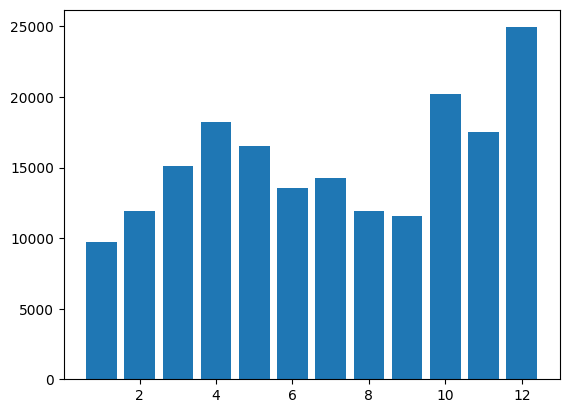

In [325]:
months=  range(1,13,1)
re = df.groupby('Month').count()
plt.bar(months,re['New_Price'])

## What city sold the most product?

In [231]:
df['Product'].groupby(df['City']).count()
# San Francisco is sold the most product

City
 Atlanta          14863
 Austin            9890
 Boston           19901
 Dallas           14797
 Los Angeles      29564
 New York City    24847
 Portland         12449
 San Francisco    44662
 Seattle          14713
Name: Product, dtype: int64

In [232]:
df['Product'].groupby(df['City']).count().max()

44662

<Axes: xlabel='count', ylabel='City'>

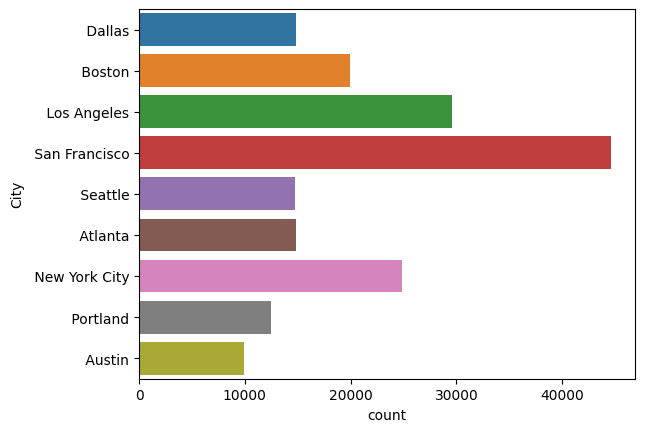

In [233]:
sns.countplot(data = df,y = 'City')

## 4 Which product was sold the least as per your categories and what might be the reason behind that. Explain your analysis.

In [234]:
df.Laptops.value_counts()

Laptops
Other                 176840
Macbook Pro Laptop      4721
ThinkPad Laptop         4126
Name: count, dtype: int64

In [235]:
df.Accessories.value_counts()

Accessories
Other                       101048
USB-C Charging Cable         21859
Lightning Charging Cable     21610
AAA Batteries (4-pack)       20612
AA Batteries (4-pack)        20558
Name: count, dtype: int64

In [236]:
df.Phones.value_counts()

Phones
Other              171260
Iphone               6840
Google Phone         5522
Vareebadd Phone      2065
Name: count, dtype: int64

In [237]:
df.Monitor.value_counts()

Monitor
other                     161692
27in FHD Monitor            7498
27in 4K Gaming Monitor      6225
34in Ultrawide Monitor      6174
20in Monitor                4098
Name: count, dtype: int64

In [238]:
df.Headphones.value_counts()

Headphones
Other                         138015
Wired Headphones               18849
Apple Airpods Headphones       15525
Bose SoundSport Headphones     13298
Name: count, dtype: int64

## 6 Which phone is sold most during the month of March?

In [239]:
df[df['Month'] == '03'].Phones.value_counts()
# So 537 Iphones sold in the month of march 

Phones
Other              13954
Iphone               537
Google Phone         463
Vareebadd Phone      174
Name: count, dtype: int64

## 9 People prefer which product more in earphones, wired or wireless?

In [240]:
df['Headphones'].value_counts()

Headphones
Other                         138015
Wired Headphones               18849
Apple Airpods Headphones       15525
Bose SoundSport Headphones     13298
Name: count, dtype: int64

People prefer Wireless Headphones more than Wired Headphone

## 7. Which headphones are the most expensive?


In [247]:
df['Headphones'].groupby(df['New_Price']).max()

New_Price
1                            Other
3                            Other
4                            Other
12                Wired Headphones
15                           Other
100     Bose SoundSport Headphones
110                          Other
150                          Other
300                          Other
380                          Other
390                          Other
400                          Other
600                          Other
700                          Other
1000                         Other
1700                         Other
Name: Headphones, dtype: object

### ANS:  Bose SoundSport Headphone is the Expensive Headphone

## 3. What time should we display advertisements to maximize likelihood of customer's buying product?


In [251]:
df.sort_values(by = 'Time',   ascending = False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product_New,Time,Month,Day,Year,New_Price,PinCode,City,Phones,Laptops,Accessories,Headphones,Monitor
95172,213274,iPhone,1,700,06/21/19 23:59,"434 Lake St, Los Angeles, CA 90001",1,23:59,06,21,19,700,90001,Los Angeles,Iphone,Other,Other,Other,other
95118,213224,Lightning Charging Cable,1,14.95,06/24/19 23:59,"746 West St, San Francisco, CA 94016",1,23:59,06,24,19,15,94016,San Francisco,Other,Other,Lightning Charging Cable,Other,other
114091,170436,AA Batteries (4-pack),1,3.84,03/25/19 23:59,"882 Sunset St, Austin, TX 73301",1,23:59,03,25,19,4,73301,Austin,Other,Other,AA Batteries (4-pack),Other,other
176476,249414,USB-C Charging Cable,1,11.95,09/26/19 23:59,"364 2nd St, New York City, NY 10001",1,23:59,09,26,19,12,10001,New York City,Other,Other,USB-C Charging Cable,Other,other
146917,288157,Apple Airpods Headphones,1,150,11/01/19 23:59,"494 Church St, Boston, MA 02215",1,23:59,11,01,19,150,02215,Boston,Other,Other,Other,Apple Airpods Headphones,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141223,282718,Flatscreen TV,1,300,11/18/19 00:00,"421 Hill St, Seattle, WA 98101",1,00:00,11,18,19,300,98101,Seattle,Other,Other,Other,Other,other
19671,237910,AAA Batteries (4-pack),1,2.99,08/31/19 00:00,"551 Park St, Seattle, WA 98101",1,00:00,08,31,19,3,98101,Seattle,Other,Other,AAA Batteries (4-pack),Other,other
102772,220537,Wired Headphones,1,11.99,06/09/19 00:00,"356 8th St, San Francisco, CA 94016",1,00:00,06,09,19,12,94016,San Francisco,Other,Other,Other,Wired Headphones,other
61953,156643,Apple Airpods Headphones,1,150,02/28/19 00:00,"520 Maple St, New York City, NY 10001",1,00:00,02,28,19,150,10001,New York City,Other,Other,Other,Apple Airpods Headphones,other


In [304]:
df['DATE_TIME'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['DATE_TIME'].dt.hour
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_64020\1450638706.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE_TIME'] = pd.to_datetime(df['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product_New,Time,Month,Day,...,New_Price,PinCode,City,Phones,Laptops,Accessories,Headphones,Monitor,DATE_TIME,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",1,08:46,04,19,...,12,75001,Dallas,Other,Other,USB-C Charging Cable,Other,other,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1,22:30,04,07,...,100,02215,Boston,Other,Other,Other,Bose SoundSport Headphones,other,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,14:38,04,12,...,600,90001,Los Angeles,Google Phone,Other,Other,Other,other,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1,14:38,04,12,...,12,90001,Los Angeles,Other,Other,Other,Wired Headphones,other,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1,09:27,04,30,...,12,90001,Los Angeles,Other,Other,Other,Wired Headphones,other,2019-04-30 09:27:00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",1,20:56,09,17,...,3,90001,Los Angeles,Other,Other,AAA Batteries (4-pack),Other,other,2019-09-17 20:56:00,20
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",1,16:00,09,01,...,700,94016,San Francisco,Iphone,Other,Other,Other,other,2019-09-01 16:00:00,16
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",1,07:39,09,23,...,700,94016,San Francisco,Iphone,Other,Other,Other,other,2019-09-23 07:39:00,7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",1,17:30,09,19,...,380,94016,San Francisco,Other,Other,Other,Other,34in Ultrawide Monitor,2019-09-19 17:30:00,17


Text(0, 0.5, 'No. Of Orders')

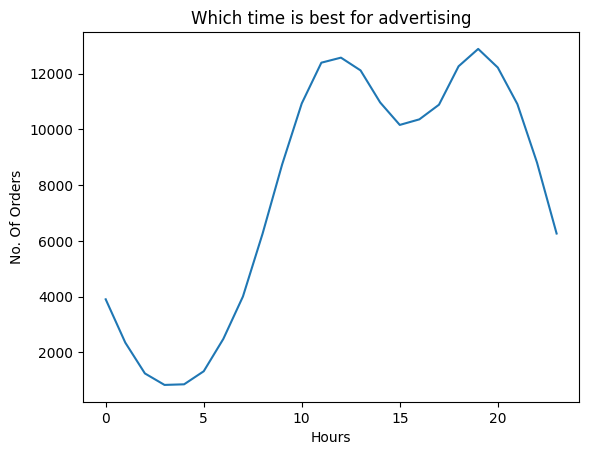

In [307]:
r = df.groupby(['Hour'])['Quantity Ordered'].count()
hrs = [hour for hour,df in df.groupby('Hour')]
plt.plot(hrs,r)
plt.title('Which time is best for advertising')
plt.xlabel("Hours")
plt.ylabel('No. Of Orders')

In [253]:
# df.drop(519,inplace  = True)

## 10. Which product in every category in more likely to be ordered in bulk?

In [255]:
df['Quantity Ordered'].groupby(df['Product']).max()

Product
20in Monitor                  2
27in 4K Gaming Monitor        2
27in FHD Monitor              2
34in Ultrawide Monitor        2
AA Batteries (4-pack)         7
AAA Batteries (4-pack)        9
Apple Airpods Headphones      3
Bose SoundSport Headphones    3
Flatscreen TV                 2
Google Phone                  2
LG Dryer                      1
LG Washing Machine            1
Lightning Charging Cable      4
Macbook Pro Laptop            2
ThinkPad Laptop               2
USB-C Charging Cable          6
Vareebadd Phone               2
Wired Headphones              4
iPhone                        2
Name: Quantity Ordered, dtype: object

In [260]:
df['Quantity Ordered'].value_counts()

Quantity Ordered
1    168291
2     13321
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: count, dtype: int64

In [262]:
df[df['Quantity Ordered'] == max(df['Quantity Ordered'])]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product_New,Time,Month,Day,Year,New_Price,PinCode,City,Phones,Laptops,Accessories,Headphones,Monitor
81010,226483,AAA Batteries (4-pack),9,2.99,07/20/19 23:28,"867 Sunset St, San Francisco, CA 94016",1,23:28,07,20,19,3,94016,San Francisco,Other,Other,AAA Batteries (4-pack),Other,other
81646,227096,AAA Batteries (4-pack),9,2.99,07/29/19 09:50,"60 10th St, San Francisco, CA 94016",1,09:50,07,29,19,3,94016,San Francisco,Other,Other,AAA Batteries (4-pack),Other,other
92877,211097,AAA Batteries (4-pack),9,2.99,06/23/19 08:29,"338 Hickory St, Los Angeles, CA 90001",1,08:29,06,23,19,3,90001,Los Angeles,Other,Other,AAA Batteries (4-pack),Other,other


AAA Batteries (4-pack) are oredered in bulk i.e the quantity ordered is 9.

## 5. Which product is most likely to be sold more during winter season, summer season and rainy season? Explain the possible reason behind the High-Volume Sale


In [282]:
# df.head()

In [290]:
Winter = df[(df['Month'] == '11')|(df['Month'] == '12')|(df['Month'] == '01')|(df['Month'] == '02')].Product.value_counts()
# Winter.sort_values(by  = 'Month')
Winter

Product
USB-C Charging Cable          7715
Lightning Charging Cable      7393
AAA Batteries (4-pack)        7231
AA Batteries (4-pack)         6997
Wired Headphones              6497
Apple Airpods Headphones      5373
Bose SoundSport Headphones    4526
27in FHD Monitor              2560
iPhone                        2389
27in 4K Gaming Monitor        2173
34in Ultrawide Monitor        2122
Google Phone                  1902
Flatscreen TV                 1673
Macbook Pro Laptop            1594
20in Monitor                  1446
ThinkPad Laptop               1404
Vareebadd Phone                715
LG Dryer                       219
LG Washing Machine             215
Name: count, dtype: int64

In [291]:
Summer = df[(df['Month'] == '03')|(df['Month'] == '04')|(df['Month'] == '05')|(df['Month'] == '06')].Product.value_counts()
Summer

Product
Lightning Charging Cable      7435
USB-C Charging Cable          7250
AA Batteries (4-pack)         7095
AAA Batteries (4-pack)        6972
Wired Headphones              6463
Apple Airpods Headphones      5321
Bose SoundSport Headphones    4592
27in FHD Monitor              2587
iPhone                        2400
34in Ultrawide Monitor        2167
27in 4K Gaming Monitor        2034
Google Phone                  1913
Macbook Pro Laptop            1649
Flatscreen TV                 1581
ThinkPad Laptop               1420
20in Monitor                  1369
Vareebadd Phone                734
LG Dryer                       246
LG Washing Machine             244
Name: count, dtype: int64

In [300]:
Rainy = df[(df['Month'] == '07')|(df['Month'] == '08')|(df['Month'] == '09')|(df['Month'] == '10')].Product.value_counts()
Rainy

Product
USB-C Charging Cable          6894
Lightning Charging Cable      6782
AA Batteries (4-pack)         6466
AAA Batteries (4-pack)        6409
Wired Headphones              5889
Apple Airpods Headphones      4831
Bose SoundSport Headphones    4180
27in FHD Monitor              2351
iPhone                        2051
27in 4K Gaming Monitor        2018
34in Ultrawide Monitor        1885
Google Phone                  1707
Flatscreen TV                 1540
Macbook Pro Laptop            1478
ThinkPad Laptop               1302
20in Monitor                  1283
Vareebadd Phone                616
LG Washing Machine             207
LG Dryer                       181
Name: count, dtype: int64

According to me USB-C Charging cable,AA Batterries,Wired Headphones and Lightning charging cable is 
solding the most because of the there price, these products are available at very cheap rate.

## 8. Check if the price of any product is changing in different months. If yes, explain the possible reason behind the price change

In [ ]:
# I created line plot to see the price variations

In [373]:
headphone = df[['New_Price','Month','Headphones']]
monitor = df[['New_Price','Month','Monitor']]
phones= df[['New_Price','Month','Phones']]
accessories = df[['New_Price','Month','Headphones']]
laptops = df[['New_Price','Month','Laptops']]

Text(0.5, 1.0, 'Headphones Price According To Months')

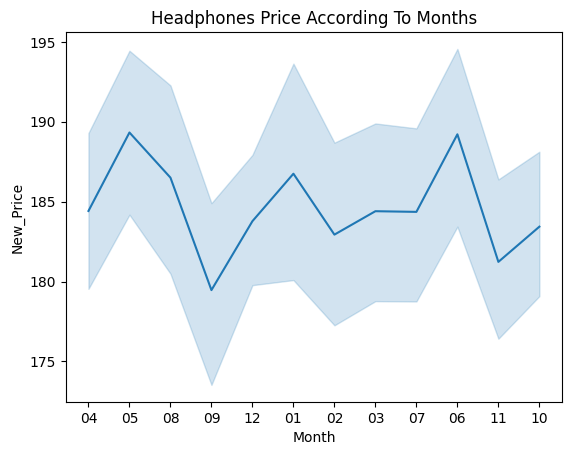

In [397]:
sns.lineplot(data  = headphone,x = 'Month',y = 'New_Price')
plt.title("Headphones Price According To Months")

Text(0.5, 1.0, 'Phones Price According To Months')

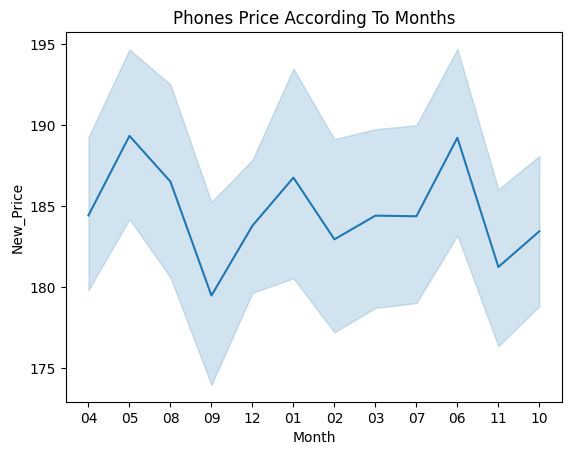

In [401]:
sns.lineplot(data  = phones,x = 'Month',y = 'New_Price')
plt.title("Phones Price According To Months")

Text(0.5, 1.0, 'Monitor Price According To Months')

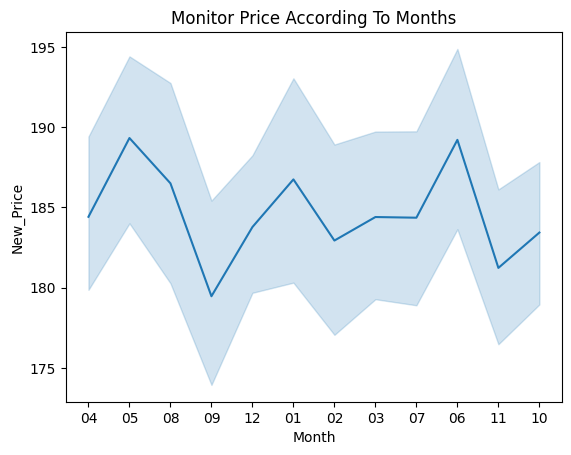

In [402]:
sns.lineplot(data  = monitor,x = 'Month',y = 'New_Price')
plt.title("Monitor Price According To Months")

Text(0.5, 1.0, 'Accessories Price According To Months')

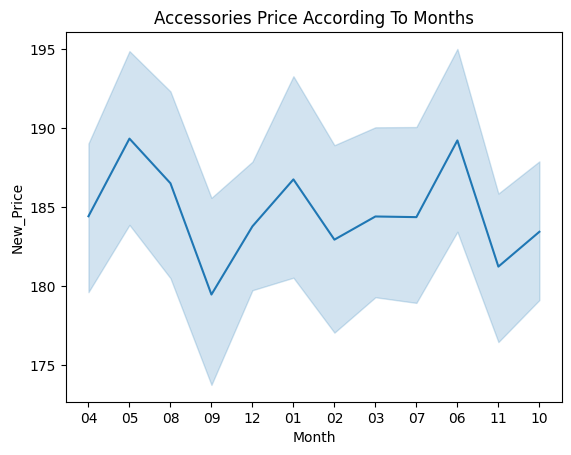

In [403]:
sns.lineplot(data  = accessories,x = 'Month',y = 'New_Price')
plt.title("Accessories Price According To Months")

Text(0.5, 1.0, 'Laptop Price According To Months')

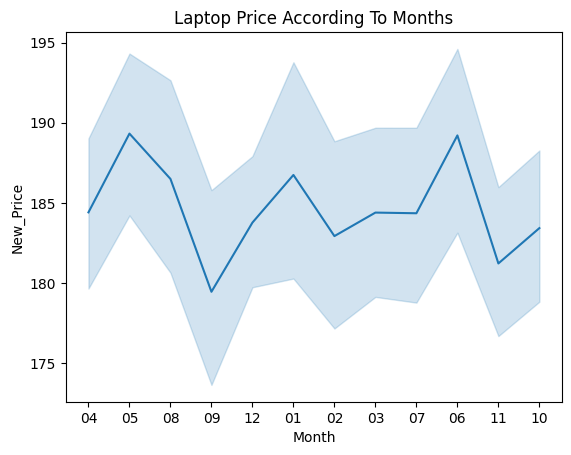

In [406]:
sns.lineplot(data  = laptops,x = 'Month',y = 'New_Price')
plt.title("Laptop Price According To Months")